# Importing the libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Importing the dataset

In [2]:
import copy
df = pd.read_csv("creditcard.csv")
df1 = copy.deepcopy(df)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Checking for missing values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df = df.dropna(how = 'any')

# There are no missing values

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Checking the distribution of legit & fraudulent transactions

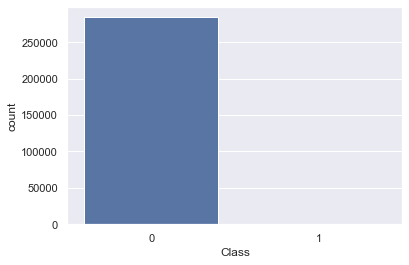

In [6]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x = 'Class', data = df)

In [7]:
legit = df[df.Class==0]
fraud = df[df.Class==1]

In [8]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


# This is a highly unbalanced dataset 

In [9]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [10]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

# Compare mean values of both type of transactions

In [11]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# We first use a method called undersampling. We will take sample dataset from the majority dataset which is equal in size to the minority dataset.

In [12]:
legit_sample = legit.sample(n=492)

# We ll combine the random legit sample with fraudulent sample to create a new dataset

In [13]:
new_df = pd.concat([legit_sample, fraud], axis = 0)

In [14]:
new_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [15]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,91294.839431,0.000076,-0.088367,0.211873,-0.116620,0.021403,-0.014803,-0.047301,-0.087766,-0.095590,...,-0.067358,0.041056,-0.013387,-0.060669,-0.051226,0.014737,-0.000288,-0.002559,-0.000791,80.458435
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


We will divide the dataset into x and y variables

In [16]:
X = new_df.drop(['Class'], axis = 1)
y = new_df.Class

In [17]:
print(y)

215543    0
132517    0
180517    0
25627     0
100481    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


# Splitting the dataset into training and test data

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, stratify = y, random_state=2)

In [19]:
print(X_train.shape)
print(X_test.shape)

(787, 30)
(197, 30)


# Training the Logistic Regression model on training data

In [20]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# Predicting the results for training data

In [21]:
predxtrain = model.predict(X_train)
print(classification_report(y_train, predxtrain))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       393
           1       0.97      0.91      0.94       394

    accuracy                           0.94       787
   macro avg       0.94      0.94      0.94       787
weighted avg       0.94      0.94      0.94       787



# Predicting the results for test data

In [22]:
pred_xtest = model.predict(X_test)
print(classification_report(y_test, pred_xtest))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        99
           1       0.96      0.90      0.93        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



In [23]:
import imblearn
print(imblearn.__version__)

0.9.1


# Now using SMOTE Oversampling 

In [24]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy= 'minority')

In [25]:
X1 = df1.drop(['Class'], axis =1)
y1 = df1.Class
print(y1)

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64


In [26]:
X_sm, y_sm = smote.fit_resample(X1,y1)
y_sm.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

# Splitting the dataset into training and test data

In [27]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X_sm, y_sm, test_size= 0.2,stratify = y_sm, random_state=2)

In [28]:
print(X1_test.shape)

(113726, 30)


# Training the L-R model

In [29]:
model2 = LogisticRegression()
model2.fit(X1_train, y1_train)

LogisticRegression()

# Predicting the values for training set

In [30]:
y1_pred = model2.predict(X1_train)
print(classification_report(y1_train, y1_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97    227452
           1       0.98      0.96      0.97    227452

    accuracy                           0.97    454904
   macro avg       0.97      0.97      0.97    454904
weighted avg       0.97      0.97      0.97    454904



# Predicting the values for test set

In [31]:
y1_pred1 = model2.predict(X1_test)
print(classification_report(y1_test, y1_pred1))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     56863
           1       0.98      0.96      0.97     56863

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726

